# ***Neural Networks***

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [7]:
# Load the dataset (make sure the path is correct)
data = pd.read_csv('/content/sample_data/Alphabets_data.csv')

# Display first few rows
print(data.head())
print(data.info())

  letter  xbox  ybox  width  height  onpix  xbar  ybar  x2bar  y2bar  xybar  \
0      T     2     8      3       5      1     8    13      0      6      6   
1      I     5    12      3       7      2    10     5      5      4     13   
2      D     4    11      6       8      6    10     6      2      6     10   
3      N     7    11      6       6      3     5     9      4      6      4   
4      G     2     1      3       1      1     8     6      6      6      6   

   x2ybar  xy2bar  xedge  xedgey  yedge  yedgex  
0      10       8      0       8      0       8  
1       3       9      2       8      4      10  
2       3       7      3       7      3       9  
3       4      10      6      10      2       8  
4       5       9      1       7      5      10  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbo

In [9]:
# Assume 'target' is the column with labels
X = data.drop('letter', axis=1)  # Features
y = data['letter']  # Target labels

# Normalize the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [10]:
!pip install keras-tuner
import keras_tuner as kt

In [11]:
# Build the ANN model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(len(y.unique()), activation='softmax'))  # Multi-class output

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder to your target labels and transform them
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.4f}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0245 - loss: 3.2932
Test Accuracy: 0.0268


In [12]:
# Define model-building function
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=128, step=32),
                    activation='relu', input_dim=X_train.shape[1]))

    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=128, step=32), activation='relu'))

    model.add(Dense(len(y.unique()), activation='softmax'))
    model.compile(optimizer=hp.Choice('optimizer', ['adam', 'sgd']),
                  loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Initialize the tuner
tuner = kt.Hyperband(build_model, objective='val_accuracy', max_epochs=10, factor=3, directory='my_dir', project_name='alphabet_classification')

# Search for the best hyperparameters
tuner.search(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

Trial 30 Complete [00h 00m 15s]
val_accuracy: 0.5575000047683716

Best val_accuracy So Far: 0.8992499709129333
Total elapsed time: 00h 04m 28s


In [16]:
# Predict the test set results
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)  # Convert probabilities to class labels

# Print classification report
print(classification_report(y_test, y_pred_classes))

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       149
           1       0.65      0.84      0.74       153
           2       0.83      0.73      0.78       137
           3       0.77      0.81      0.79       156
           4       0.80      0.85      0.82       141
           5       0.74      0.83      0.78       140
           6       0.69      0.71      0.70       160
           7       0.81      0.54      0.65       144
           8       0.91      0.82      0.86       146
           9       0.78      0.89      0.83       149
          10       0.70      0.73      0.72       130
          11       0.87      0.84      0.86       155
          12       0.87      0.93      0.90       168
          13       0.93      0.86      0.89       151
          14       0.68      0.86      0.76       145
          15       0.92      0.83      0.87       173
          16       0.85      0.73      0

Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8108 - loss: 0.6838 - val_accuracy: 0.8127 - val_loss: 0.6903
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8118 - loss: 0.6878 - val_accuracy: 0.8138 - val_loss: 0.6794
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8199 - loss: 0.6557 - val_accuracy: 0.8202 - val_loss: 0.6709
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8253 - loss: 0.6513 - val_accuracy: 0.8210 - val_loss: 0.6605
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8192 - loss: 0.6543 - val_accuracy: 0.8198 - val_loss: 0.6566
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8225 - loss: 0.6455 - val_accuracy: 0.8145 - val_loss: 0.6609
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8256 - loss: 0.6397 - val_accuracy: 0.8238 - val_loss: 0.6533
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8231 - loss: 0.6478 - val_accuracy: 0.

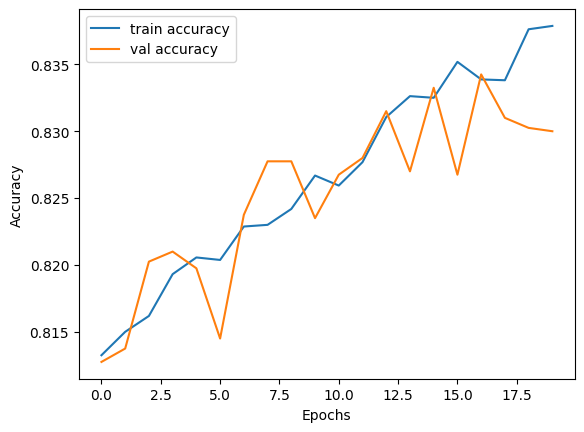

In [17]:
# Fit the model and store the training history
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test)) # Added this line to capture training history

# Plot accuracy
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()